In [26]:
from google.colab import drive
drive.mount('/gdrive')
#  %cd /gdrive/My Drive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [27]:
%cd /gdrive/My Drive

/gdrive/My Drive


In [28]:
# Fix randomness and hide warnings
seed = 42

# Filter warnings from keras
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.random.set_seed(seed)
print(f"TensorFlow version {tf.__version__}")

# Import other libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=14)
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

TensorFlow version 2.17.0


In [29]:
import numpy as np

data = np.load('training_set.npz')
X = data['images']
y = data['labels']


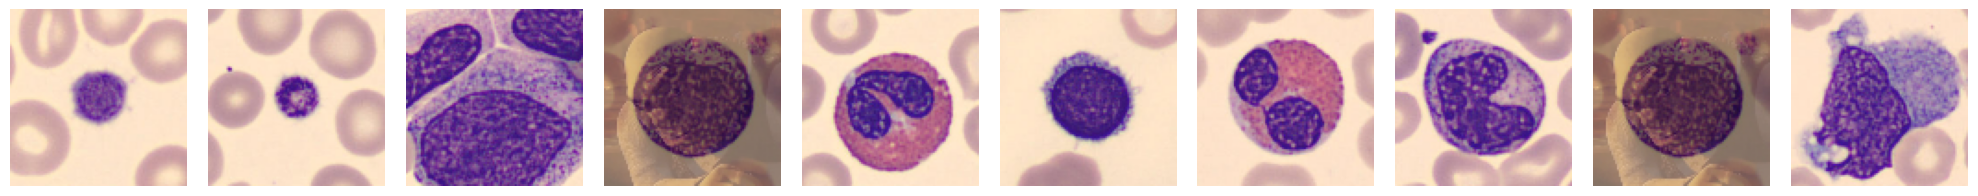

In [30]:
# Display a sample of images from the training-validation dataset
num_img = 10
random_indices = random.sample(range(len(X)), num_img)

fig, axes = plt.subplots(1, num_img, figsize=(20, 20))
# Carica il dataset
data = np.load('training_set.npz')
X = data['images']
y = data['labels']

# Identifica gli indici unici per ciascuna etichetta
_, unique_indices = np.unique(y, return_index=True)

# Estrai le immagini e le etichette corrispondenti agli indici unici
X_unique = X[unique_indices]
y_unique = y[unique_indices]

# Salva il nuovo dataset senza duplicati
np.savez('training_set_unique.npz', images=X_unique, labels=y_unique)
# Iterate through the selected number of images
for i, idx in enumerate(random_indices):
    ax = axes[i % num_img]
    ax.imshow(np.squeeze(X[idx]), vmin=0., vmax=1.)
    ax.axis('off')

# Adjust layout and display the images
plt.tight_layout()
plt.show()

In [31]:
print('Counting occurrences of target classes:')
print(pd.DataFrame(y, columns=['labels'])['labels'].value_counts())

Counting occurrences of target classes:
labels
6    2530
1    2381
3    2226
7    1843
5    1393
2    1285
0    1052
4    1049
Name: count, dtype: int64


In [32]:

# Usa np.unique per trovare indici delle immagini uniche
_, unique_indices = np.unique(X.reshape(len(X), -1), axis=0, return_index=True)

# Estrai le immagini e le etichette corrispondenti agli indici unici
X_unique = X[unique_indices]
y_unique = y[unique_indices]



In [33]:
print('Counting occurrences of target classes:')
print(pd.DataFrame(y_unique, columns=['labels'])['labels'].value_counts())

Counting occurrences of target classes:
labels
6    2330
1    2179
3    2023
7    1643
2    1085
5     993
0     851
4     849
Name: count, dtype: int64


In [34]:
print(len(X_unique))

11953


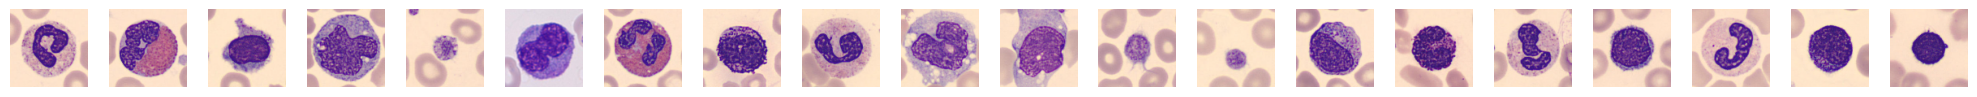

In [36]:
# Display a sample of images from the training-validation dataset
num_img = 20
random_indices = random.sample(range(len(X_unique)), num_img)

fig, axes = plt.subplots(1, num_img, figsize=(20, 20))

# Iterate through the selected number of images
for i, idx in enumerate(random_indices):
    ax = axes[i % num_img]
    ax.imshow(np.squeeze(X[idx]), vmin=0., vmax=1.)
    ax.axis('off')

# Adjust layout and display the images
plt.tight_layout()
plt.show()

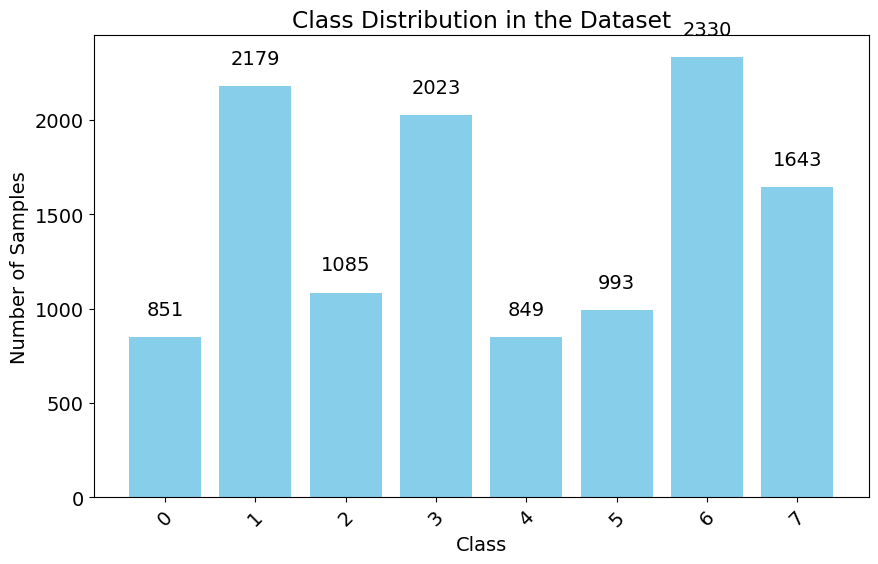

In [37]:
# Count occurrences of each class
classes, counts = np.unique(y_unique, return_counts=True)

# Create a bar plot to show class distribution
plt.figure(figsize=(10, 6))
plt.bar(classes.astype(str), counts, color='skyblue')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in the Dataset')

# Optionally, add the count value above each bar
for i in range(len(classes)):
    plt.text(classes[i], counts[i] + 0.05 * max(counts), str(counts[i]), ha='center')

# Show the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.show()